In [1]:
### Print the 3rd Friday options expiration (filter out LEAPs later).
###
###

import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime

symbol = 'IQ'
url = 'https://query2.finance.yahoo.com/v7/finance/options/'
newurl = url + symbol
df = pd.read_json(newurl)
exp = json_normalize(data=df['optionChain']['result'], record_path='expirationDates')

human_dates = []

for date in exp[0]:
    human_dates.append(datetime.datetime.fromtimestamp(int(date)).strftime('%Y-%m-%d'))
    
non_weeklies = []
    
# Actually finds Thursday because these option times are off by a day for some reason.



def is_third_friday(s):
    d = datetime.datetime.strptime(s, '%Y-%m-%d')
    return d.weekday() == 3 and 15 <= d.day <= 21

for date in human_dates:
    
    if is_third_friday(str(date)) == True:
        
        print(date)
        non_weeklies.append(date)
        
    else:
        pass


2018-07-19
2018-08-16
2018-09-20
2018-12-20
2019-01-17
2020-01-16


In [ ]:
### E-mails yourself.
###
###

import smtplib
from datetime import datetime

from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

fromaddr = 'pythonoptionsalerts@gmail.com'
toaddr = 'samchakerian@gmail'
msg = MIMEMultipart()
msg['From'] = fromaddr
msg['To'] = toaddr
msg['Subject'] = 'subject' # Put day and options alert type here

body = 'Craft elaborate body here. \nSent at ' + str(datetime.now()) + ' o\'clock. \n\nNon-weeklies option expirations:\n\n' + str(non_weeklies) # Alter based on alert type.
msg.attach(MIMEText(body, 'plain'))

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login(fromaddr, '4r3e2w1q5t')

text = msg.as_string()
server.sendmail('pythonoptionsalerts@gmail.com', 'samchakerian@gmail.com', text)
server.quit()


In [ ]:
### Scrape barcharts.com highest IV and most traded options, scrape the options chain, e-mail yourself the IV skew.
###
###


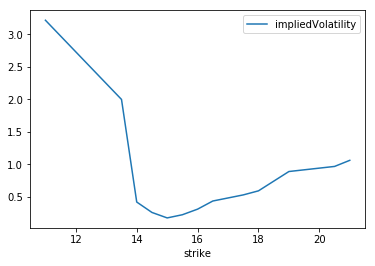

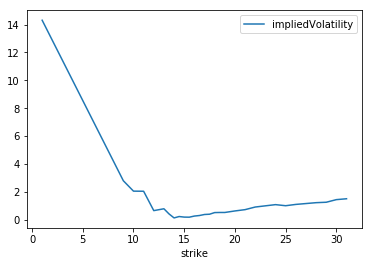

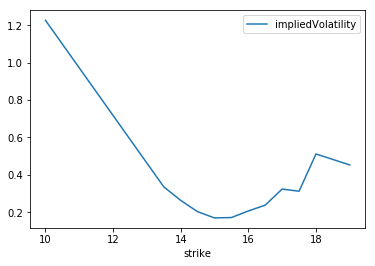

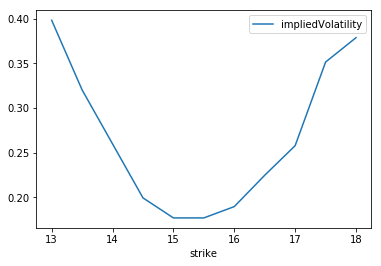

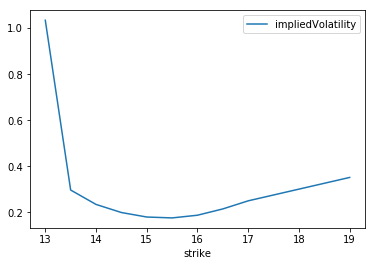

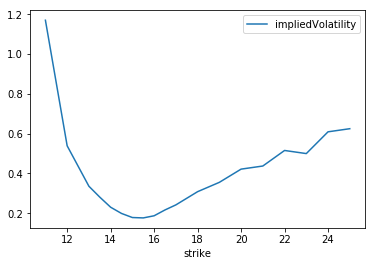

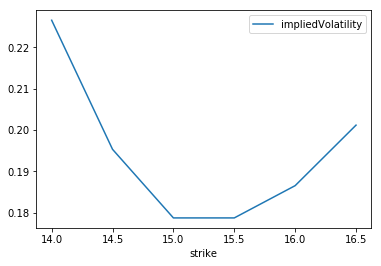

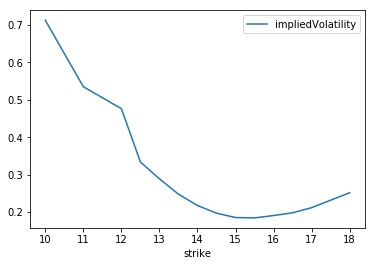

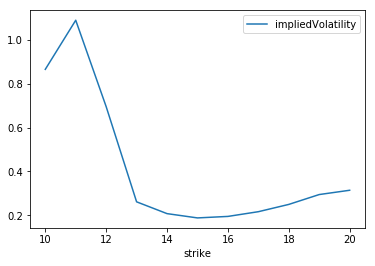

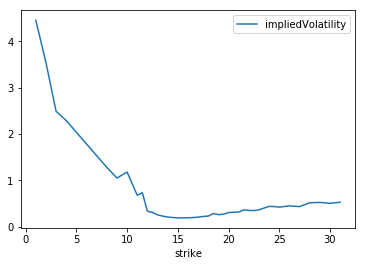

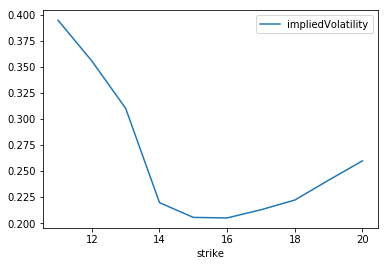

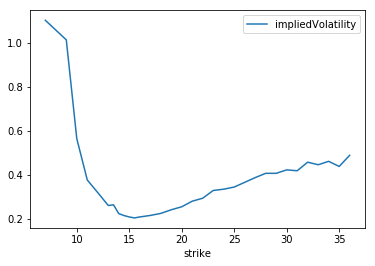

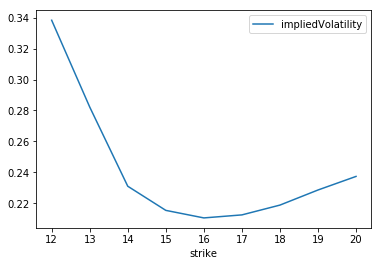

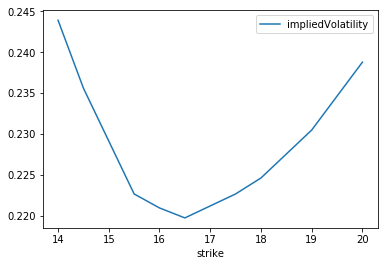

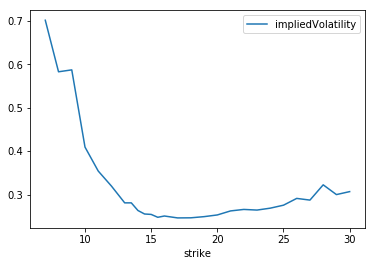

In [33]:
### Print skew charts.
###
###

# Got skews for individual options, but haven't linked them together... also need to define monthlies (from above cell.)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sym = pd.read_csv(r'C:\Users\samn\Documents\PY\YF_Scraper_Results\20180707_2028\SLV_20180707_2036_oc.csv')

exp1 = []
dte1 = []
ht1 = []

for i in range(len(sym['expiration'].unique())):
    exp1.append(sym['expiration'].unique()[i])
    dte1.append(sym['dte'].unique()[i])
    ht1.append(sym['human_time'].unique()[i])

exp_df = pd.DataFrame()

exp_df['exp'] = exp1
exp_df['dte'] = dte1
exp_df['ht'] = ht1

exp_df

expirations = sym['expiration'].unique()

iv = sym[sym['expiration'] == expirations[1]]

iv_call = iv[iv['type'] == 'call']
iv_put = iv[iv['type'] == 'put']

for i in range(len(expirations)):
    
    expirations = sym['expiration'].unique()

    iv = sym[sym['expiration'] == expirations[i]]

    iv_call = iv[iv['type'] == 'call']
    iv_put = iv[iv['type'] == 'put']
    
    expirations = sym['expiration'].unique()

    iv = sym[sym['expiration'] == expirations[i]]

    iv_call = iv[iv['type'] == 'call']
    iv_put = iv[iv['type'] == 'put']

    iv_call[['strike', 'impliedVolatility']].set_index('strike').plot()
    #iv_put[['strike', 'impliedVolatility']].set_index('strike').plot()



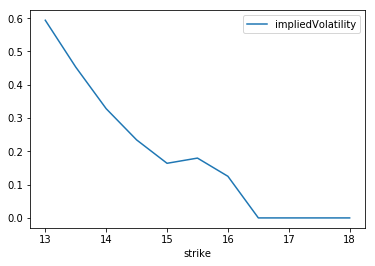

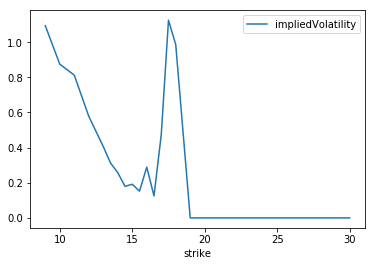

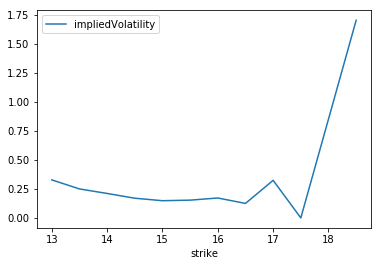

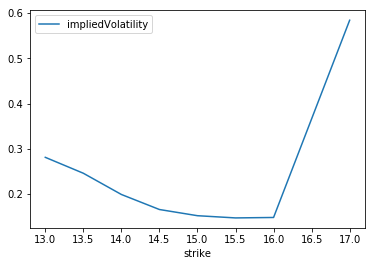

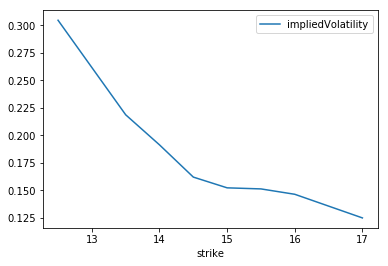

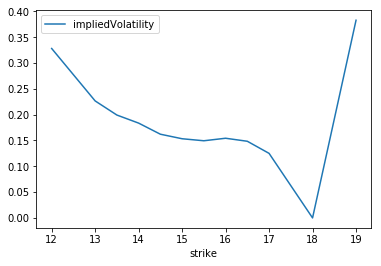

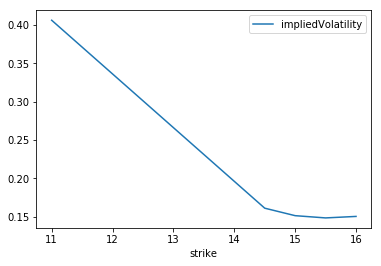

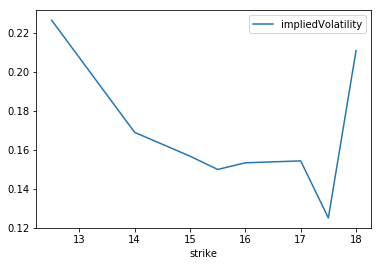

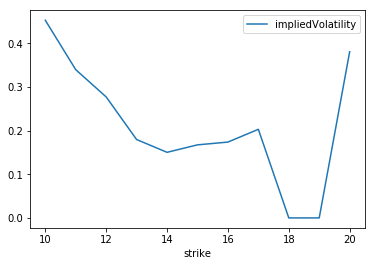

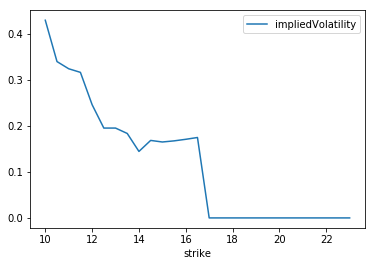

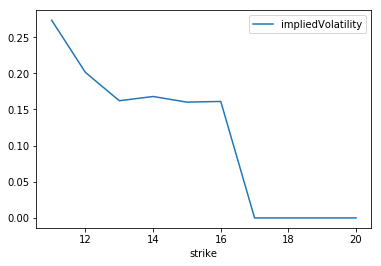

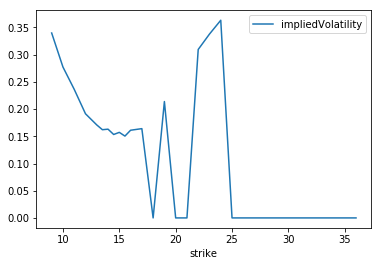

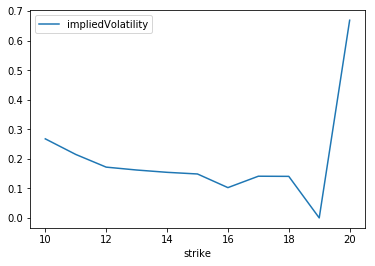

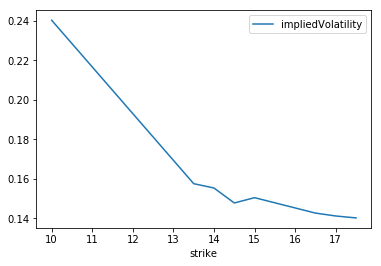

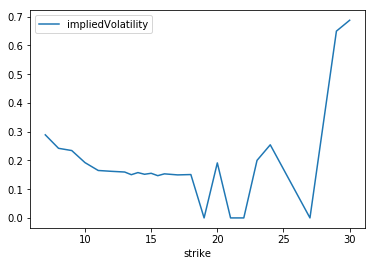

In [34]:
# More from above.

expirations = sym['expiration'].unique()

for i in range(len(expirations)):

    iv = sym[sym['expiration'] == expirations[i]]

    iv_call = iv[iv['type'] == 'call']
    iv_put = iv[iv['type'] == 'put']
    
    #iv_call[['strike', 'impliedVolatility']].set_index('strike').plot()
    iv_put[['strike', 'impliedVolatility']].set_index('strike').plot()

dte          4        11        18        25        32        39        46   \
strike                                                                        
16.0    0.312507  0.25782  0.207039  0.189461  0.187508  0.187508  0.186532   

dte          74        81        102       175       193       263       354  \
strike                                                                         
16.0    0.190926  0.195321  0.196297  0.205086  0.207527  0.210457  0.220955   

dte          557  
strike            
16.0    0.250496  


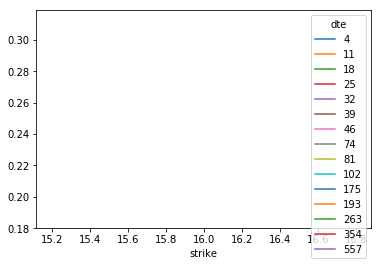

In [37]:
# Expirmental part from above, point is to plot multiple expirations. Needs monthlies defined.

expirations = sym['expiration'].unique()

iv_multi = sym[sym['expiration'].isin(expirations)]

iv_multi_call = iv_multi[iv_multi['type'] == 'call']
iv_multi_put = iv_multi[iv_multi['type'] == 'put']

iv_pivoted = iv_multi_call[['dte', 'strike', 'impliedVolatility']].pivot(index='strike', columns = 'dte', values='impliedVolatility').dropna()

print(iv_pivoted)

iv_pivoted.plot()

In [38]:
# More of the above.

#Only uses the first 3 
iv_multi = sym[sym['expiration'].isin(monthlies[1:5])]

iv_multi_put = iv_multi[iv_multi['type'] == 'put']
iv_multi_call = iv_multi[iv_multi['type'] == 'call']

iv_pivoted = iv_multi_call[['dte', 'strike', 'impliedVolatility']].pivot(index='strike', columns = 'dte', values= 'impliedVolatility').dropna()
#iv_pivoted = iv_multi_put[['dte', 'strike', 'impliedVolatility']].pivot(index='strike', columns = 'dte', values='impliedVolatility').dropna()

iv_pivoted.plot()

NameError: name 'monthlies' is not defined

In [ ]:
### Find top performing instruments, chart the correlation, e-mail it to yourself.
###
###



In [ ]:
### Prints "uncorrelation" heatmap and list of least correlated, higest volume options.
###
###

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import fix_yahoo_finance as yf

now = datetime.datetime.now()
now2 = now.strftime('%Y-%m-%d')

# Most active options
actives = pd.read_csv('active_options.csv')

top = pd.DataFrame(actives.loc[:100])

symbol_list = [x for x in top.Symbol]

main_df = pd.DataFrame()

# Figure out how to pickle this so you don't have to do it every time.

for sym in symbol_list:
    
    try:
        df = yf.download(sym, '2000-1-1', now)
        
    except ValueError:
        pass
    
    print(sym)
    
    #df.set_index('Date', inplace=True) 

    df.rename(columns = {'Adj Close': sym}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
    
    if main_df.empty:
        main_df = df
        
    else:
        main_df = main_df.join(df, how='outer', on='Date')    

        
df_corr = main_df.corr()

shittylist = []
othershittylist = []

for x in top.Symbol:
    
    """
    print(x)
    print(np.sum(df_corr[x]))
    print(np.sum(df_corr[x]) - 1.0)
    print((np.sum(df_corr[x]) - 1.0) / (len(df_corr) - 1.0)) # "Avg correlation"
    print(abs((np.sum(df_corr[x]) - 1.0) / (len(df_corr) - 1.0))) # Abs avg correlation
    """
    
    shittylist.append((np.sum(df_corr[x]) - 1.0) / (len(df_corr) - 1.0))
    othershittylist.append(abs((np.sum(df_corr[x]) - 1.0) / (len(df_corr) - 1.0)))


top['avg_corr'] = shittylist
top['abs'] = othershittylist

top_uncorr = top.sort_values(by = 'abs')
print(top_uncorr)
#top_uncorr[:25].sort_values(by = 'Options Vol.', ascending=False) # This sorts by volume, which'd be nice.

# Plot sorted data for fun

cs_ls = [x for x in top_uncorr.Symbol]

main_df_sorted = pd.DataFrame(columns = cs_ls)

for x in main_df_sorted:
    main_df_sorted[x] = main_df[x]

data = main_df_sorted.corr().values

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
fig.colorbar(heatmap)

ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = df_corr.columns
row_labels = df_corr.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

plt.xticks(rotation=90)
#heatmap.set_clim(-1, 1)

plt.tight_layout()



In [ ]:
# Part two of above.

# Sort main_df by symbols in corr_sorted, then do .corr()

#main_df
#main_df.corr()

# Weight by vol x uncorrelation... later

# Re-sort actives by uncorrelation, print the top 20

new_list = []

for x in cs_ls:
    
    #print(actives[actives['Symbol'] == x])
    new_list.append(actives[actives['Symbol'] == x].values[0])

new_actives = pd.DataFrame(new_list, columns = [x for x in actives])
#new_actives[:20]

print(new_actives)

In [ ]:

### Figure out how to find interesting CoT data (highs and lows) and e-mail it to yourself.
###### Figure out if there is > standard deviation change in CoT.
###
###
    

In [ ]:
# Pyramiding small pos limit orders based on pivot point S/R in fx.
